In [1]:
import os
import numpy as np 
import pandas as pd
import arcpy
from arcpy import env

In [19]:
result_path = r"F:\cache_data\pre_soiltype_table\dy\autogluon\predict_csv\prediction_soiltype_tz_LightGBM_20240227.csv"

In [20]:
# 读取预测结果
data = pd.read_csv(result_path,index_col=False)

In [21]:
stander_path = r"D:\ArcGISProjects\workspace\shbyq\feature_raster_file\features_data_dy.gdb\DEM"

In [22]:
data.columns

Index(['prediction_0', 'prediction_1', 'prediction_2', 'prediction_3',
       'prediction_4', 'prediction_5', 'prediction_6', 'prediction_7',
       'prediction_8', 'prediction_9',
       ...
       'prediction_334', 'prediction_335', 'prediction_336', 'prediction_337',
       'prediction_338', 'prediction_339', 'prediction_340', 'prediction_341',
       'prediction_342', 'prediction_343'],
      dtype='object', length=344)

In [23]:
# 合并除第一列外的所有列到第一列
frames = []
for col in data.columns:
    frames.append(data[col])

# 合并 DataFrame
merged_data = pd.concat(frames, axis=0, ignore_index=True)

In [24]:
merged_data.dropna(inplace=True)

In [25]:
merged_data.size

171871183

In [9]:
merged_data.value_counts()

54.0    26566549
53.0    24798492
76.0    23703987
59.0    22971316
8.0     15776762
46.0    14113369
6.0      6416518
61.0     5847378
11.0     4618909
57.0     3934883
43.0     3312472
60.0     2593397
48.0     2004752
12.0     1917346
25.0     1875139
52.0     1758934
42.0     1587400
63.0      952463
78.0      797963
79.0      728091
65.0      710304
56.0      704344
47.0      532296
49.0      521152
80.0      482906
75.0      323794
50.0      281187
14.0      261887
15.0      256240
27.0      213251
29.0      175090
21.0      154805
74.0      151964
26.0      145810
28.0      106942
41.0       95759
9.0        93756
64.0       63051
40.0       59096
55.0       40326
1.0        40105
45.0       39443
13.0       32811
22.0       29134
35.0       29028
17.0       17877
82.0       13664
10.0       13206
20.0        5835
dtype: int64

In [20]:

# def label_array(mixed_array):
#     # 获取唯一的值
#     unique_values = list(set(merged_data.values))

#     # 创建一个字典来映射唯一值到标签
#     label_mapping = {value: index for index, value in enumerate(unique_values)}

#     # 使用字典映射函数将数组标签化
#     labeled_array = np.vectorize(label_mapping.get)(mixed_array)
#     return labeled_array,label_mapping
# # 标签化array
# cach_result = label_array(merged_data)

In [10]:
type(merged_data)

pandas.core.series.Series

In [26]:
dem_array = arcpy.RasterToNumPyArray(stander_path)
dem_array.shape

(12881, 13343)

In [12]:
dem_array.shape[0] * dem_array.shape[1]

171871183

In [27]:
raster_array = np.reshape(merged_data.values,dem_array.shape)

In [28]:
raster_array = raster_array.astype(np.float32)

In [15]:
dem_array.dtype,raster_array.dtype

(dtype('float32'), dtype('float32'))

In [29]:
env.workspace = r"D:\ArcGISProjects\workspace\shbyq\feature_soiltype_result\feature_soiltype_result_dy.gdb"
env.extent = stander_path

In [30]:
# 掩膜提取
def mask_raster(array,mask_ele,cell_size):
    out_raster = arcpy.NumPyArrayToRaster(
    array,
    arcpy.Point(arcpy.env.extent.XMin, arcpy.env.extent.YMin),
    cell_size,
    cell_size,
)
    """按掩膜提取栅格,空间参考设定为:CGCS2000_3_Degree_GK_CM_108E"""
    output_coordinate_system = arcpy.Describe(mask_ele).spatialReference
    with arcpy.EnvManager(outputCoordinateSystem=output_coordinate_system,snapRaster=mask_ele, cellSize=mask_ele):
        result_raster = arcpy.sa.ExtractByMask(out_raster, mask_ele, "INSIDE")
        return result_raster

In [31]:
# 按掩膜处理
result_raster = mask_raster(raster_array,stander_path, 5)
# result_raster.save("prediction_sioltype_CATB_20240226")
print("完成")

完成


In [32]:
# 按掩膜分割
# 按掩膜提取
def mask_extraction(in_raster,mask_ele,pro_ele):
    ele_pro = arcpy.Describe(pro_ele).spatialReference
    with arcpy.EnvManager(outputCoordinateSystem=ele_pro,snapRaster=pro_ele, cellSize=5):
        out_raster = arcpy.sa.ExtractByMask(in_raster, mask_ele, "INSIDE", ele_pro)
        return out_raster
mask_ele = r"D:\ArcGISProjects\workspace\shbyq\features_data_vector.gdb\extent\DY_500"
clip_raster = mask_extraction(result_raster,mask_ele,result_raster)
clip_raster.save("prediction_soiltype_tz_LightGBM_20240227")

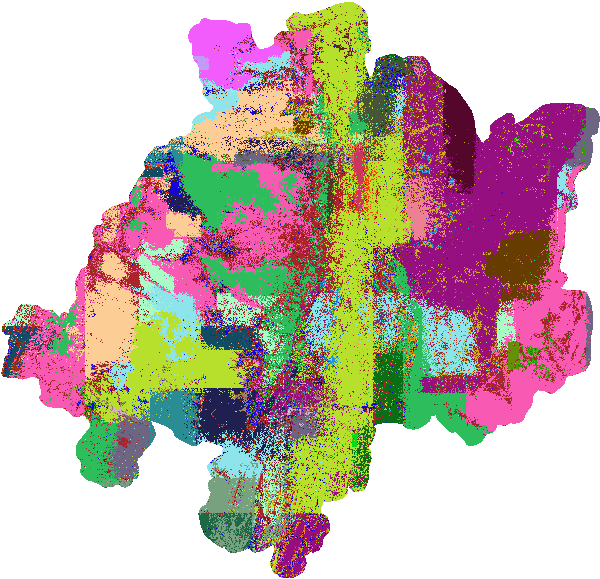

In [33]:
arcpy.sa.Int(clip_raster)

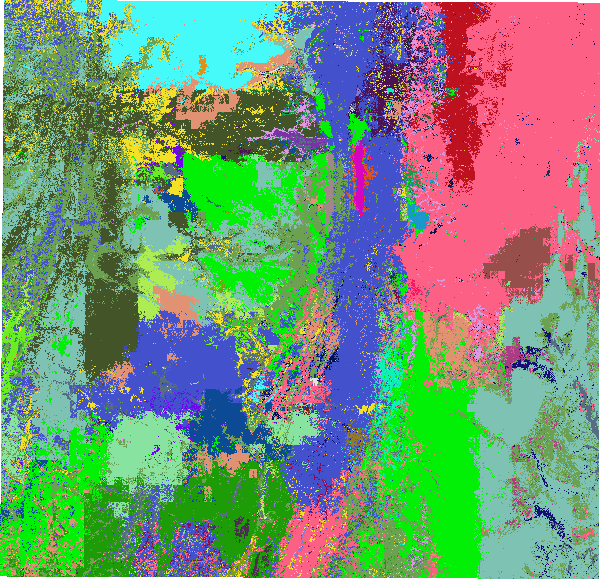

In [17]:
arcpy.sa.Int(result_raster)

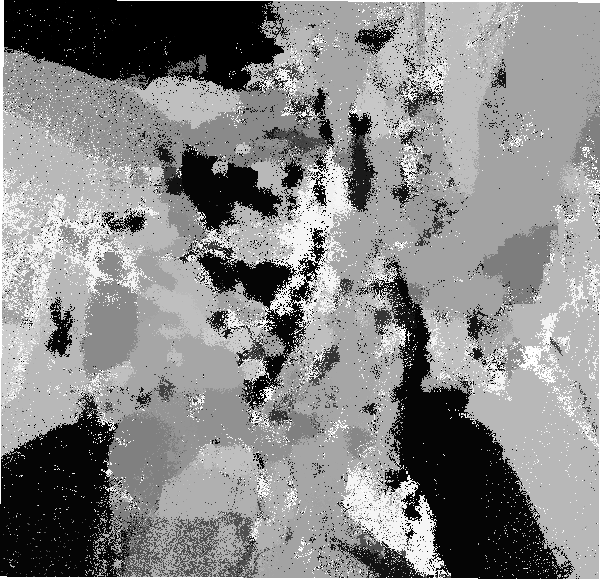

In [37]:
result_raster

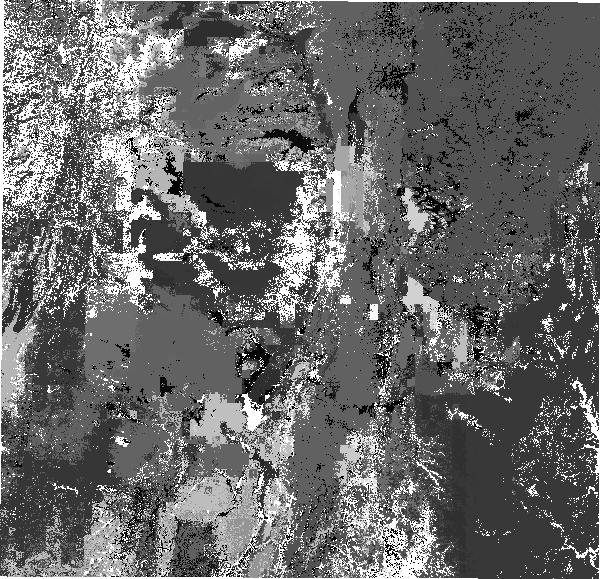

In [18]:
result_raster

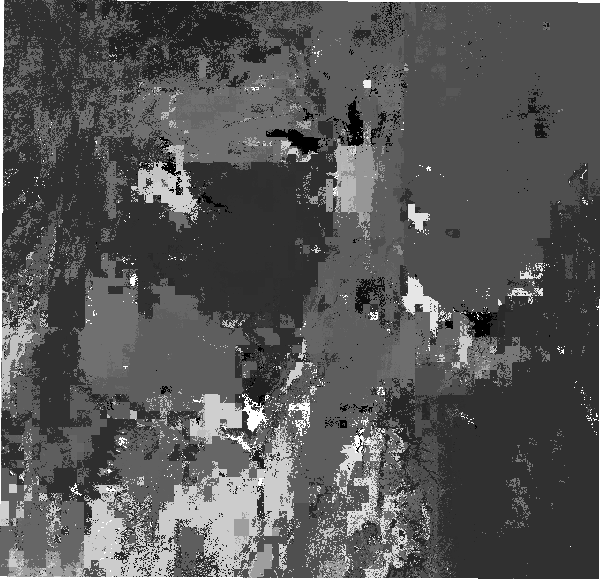

In [19]:
result_raster